In [1]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import datetime as dt

from sklearn.utils import resample, shuffle

# 년도별 데이터 나누기

In [2]:
stock_df= pd.read_csv('/kaggle/input/sp-500-10-22/sp500_stocks.csv')
stock_df

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,59.318886,83.019997,83.449997,82.669998,83.089996,3043700.0
1,2010-01-05,MMM,58.947342,82.500000,83.230003,81.699997,82.800003,2847000.0
2,2010-01-06,MMM,59.783295,83.669998,84.599998,83.510002,83.879997,5268500.0
3,2010-01-07,MMM,59.826176,83.730003,83.760002,82.120003,83.320000,4470100.0
4,2010-01-08,MMM,60.247749,84.320000,84.320000,83.300003,83.690002,3405800.0
...,...,...,...,...,...,...,...,...
1638769,2022-12-05,ZTS,155.330002,155.330002,156.669998,154.580002,155.630005,2087400.0
1638770,2022-12-06,ZTS,153.050003,153.050003,155.500000,152.089996,154.220001,1964800.0
1638771,2022-12-07,ZTS,150.250000,150.250000,153.789993,149.380005,152.960007,2444100.0
1638772,2022-12-08,ZTS,153.679993,153.679993,154.350006,149.199997,150.529999,2267500.0


In [3]:
stock_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638774 entries, 0 to 1638773
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date       1638774 non-null  object 
 1   Symbol     1638774 non-null  object 
 2   Adj Close  1569847 non-null  float64
 3   Close      1569847 non-null  float64
 4   High       1569847 non-null  float64
 5   Low        1569847 non-null  float64
 6   Open       1569847 non-null  float64
 7   Volume     1569847 non-null  float64
dtypes: float64(6), object(2)
memory usage: 100.0+ MB


### 널값은 제외

In [4]:
stock_df = stock_df.dropna(axis=0)

In [5]:
stock_df['rate'] = ((stock_df.Close - stock_df.Open)/ stock_df.Open)*100
stock_df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,rate
0,2010-01-04,MMM,59.318886,83.019997,83.449997,82.669998,83.089996,3043700.0,-0.084246
1,2010-01-05,MMM,58.947342,82.500000,83.230003,81.699997,82.800003,2847000.0,-0.362323
2,2010-01-06,MMM,59.783295,83.669998,84.599998,83.510002,83.879997,5268500.0,-0.250357
3,2010-01-07,MMM,59.826176,83.730003,83.760002,82.120003,83.320000,4470100.0,0.492083
4,2010-01-08,MMM,60.247749,84.320000,84.320000,83.300003,83.690002,3405800.0,0.752775
...,...,...,...,...,...,...,...,...,...
1638769,2022-12-05,ZTS,155.330002,155.330002,156.669998,154.580002,155.630005,2087400.0,-0.192767
1638770,2022-12-06,ZTS,153.050003,153.050003,155.500000,152.089996,154.220001,1964800.0,-0.758655
1638771,2022-12-07,ZTS,150.250000,150.250000,153.789993,149.380005,152.960007,2444100.0,-1.771709
1638772,2022-12-08,ZTS,153.679993,153.679993,154.350006,149.199997,150.529999,2267500.0,2.092602


In [6]:
df_10 = stock_df[stock_df.Date.str.contains('2010')]
df_11 = stock_df[stock_df.Date.str.contains('2011')]
df_12 = stock_df[stock_df.Date.str.contains('2012')]
df_13 = stock_df[stock_df.Date.str.contains('2013')]
df_14 = stock_df[stock_df.Date.str.contains('2014')]
df_15 = stock_df[stock_df.Date.str.contains('2015')]
df_16 = stock_df[stock_df.Date.str.contains('2016')]
df_17 = stock_df[stock_df.Date.str.contains('2017')]
df_18 = stock_df[stock_df.Date.str.contains('2018')]
df_19 = stock_df[stock_df.Date.str.contains('2019')]
df_20 = stock_df[stock_df.Date.str.contains('2020')]
df_21 = stock_df[stock_df.Date.str.contains('2021')]
df_22 = stock_df[stock_df.Date.str.contains('2022')]

## 2010년

In [7]:
# 종목중 한해에 20%이상의 변동율을 보이는 종목이 몇개인지 확인하기
# 

In [8]:
df_year = df_10

In [9]:
df_year_symbol_list = df_year.Symbol.unique()

In [10]:
min_list = []
max_list = []
for symbol in df_year_symbol_list:
    min_list.append(df_year.loc[df_year.Symbol == symbol].Close.min())
    max_list.append(df_year.loc[df_year.Symbol == symbol].Close.max())

In [11]:
close_d = {'symbol': df_year_symbol_list, 'min': min_list, 'max' : max_list}

In [12]:
close_df = pd.DataFrame(data = close_d)
close_df['percent'] = close_df['max'] / close_df['min']
close_df['target'] = close_df['percent'].apply(lambda x : 1 if x >= 1.2 else 0 )

In [13]:
close_df.target.value_counts()
# => 이정도면 해볼만 하다.
# 내일 할것
# 1. max날짜와 min날짜 비교해보기

1    425
0     25
Name: target, dtype: int64

<AxesSubplot:>

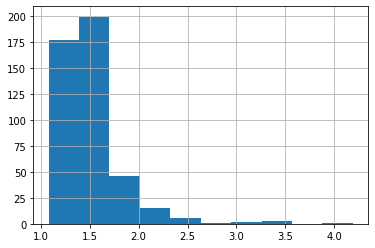

In [14]:
close_df.percent.hist()

In [15]:
t_1_symbol_list = close_df.loc[close_df['target'] == 1].symbol.to_list()

## 날짜 확인

In [16]:
date_df = pd.DataFrame()

for symbol in tqdm(t_1_symbol_list):
    max_value = df_year.loc[df_year['Symbol'] == symbol].Close.max()
    min_value = df_year.loc[df_year['Symbol'] == symbol].Close.min()

    min_data = df_year.loc[(df_year['Symbol'] == symbol) & (df_year['Close'] == min_value)][['Date','Symbol','Close']]
    max_data = df_year.loc[(df_year['Symbol'] == symbol) & (df_year['Close'] == max_value)][['Date','Symbol', 'Close']]

    date_df = pd.concat([date_df, min_data])
    date_df = pd.concat([date_df, max_data])

100%|██████████| 425/425 [00:14<00:00, 28.77it/s]


In [17]:
date_check_df = pd.DataFrame()
for symbol in tqdm(t_1_symbol_list):
    symbol_date = date_df.loc[date_df['Symbol'] == symbol]['Date'].values
    ex_check_list = [symbol, symbol_date[0] < symbol_date[1]]
    ex_check_df = pd.DataFrame(np.array([ex_check_list]), columns=['Symbol', 'check'])
    date_check_df = pd.concat([date_check_df, ex_check_df])
    
date_check_df.head()

100%|██████████| 425/425 [00:00<00:00, 962.72it/s]


,Symbol,check
0,MMM,True
0,AOS,True
0,ABT,False
0,ABMD,True
0,ACN,True


In [18]:
symbol_date = date_df.loc[date_df['Symbol'] == symbol]['Date'].values
ex_check_list = [symbol, symbol_date[0] < symbol_date[1]]

In [19]:
date_check_df = date_check_df.reset_index(drop=True)

In [20]:
date_check_df.iloc[:,1].value_counts()
# 314개 종목이 증가형 변동을 보임.

True     314
False    111
Name: check, dtype: int64

### 날자 간격 확인

In [21]:
true_df = date_check_df.loc[date_check_df['check'] == 'True']
true_symbol_list = true_df['Symbol'].to_list()

days_list = []
date_0_list = []
date_1_list = []
close_list_1 = []
close_list_0 = []
for symbol in true_symbol_list:
    symbol_date = date_df.loc[date_df['Symbol'] == symbol]['Date'].values
    symbol_date_1 = dt.datetime.strptime(symbol_date[1], '%Y-%m-%d').date()
    symbol_date_0 = dt.datetime.strptime(symbol_date[0], '%Y-%m-%d').date()
    days_list.append((symbol_date_1 - symbol_date_0).days)
    date_0_list.append(symbol_date_0)
    date_1_list.append(symbol_date_1)
    close_list_0.append(date_df.loc[date_df['Symbol'] == symbol]['Close'].values[0])
    close_list_1.append(date_df.loc[date_df['Symbol'] == symbol]['Close'].values[1])
    
    
true_df['days'] = days_list
true_df['date_0'] = date_0_list
true_df['date_1'] = date_1_list
true_df['Close_min'] = close_list_0
true_df['Close_max'] = close_list_1

true_df['rate'] = true_df['Close_max']/true_df['Close_min']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [22]:
true_df.head()

,Symbol,check,days,date_0,date_1,Close_min,Close_max,rate
0,MMM,True,140,2010-06-07,2010-10-25,74.739998,90.900002,1.216216
1,AOS,True,309,2010-02-04,2010-12-10,6.910000,10.767500,1.558249
3,ABMD,True,328,2010-01-12,2010-12-06,7.890000,12.190000,1.544994
4,ACN,True,1,2010-06-08,2010-06-09,36.439999,36.439999,1.000000
5,ATVI,True,338,2010-01-26,2010-12-30,10.010000,12.570000,1.255744


<AxesSubplot:>

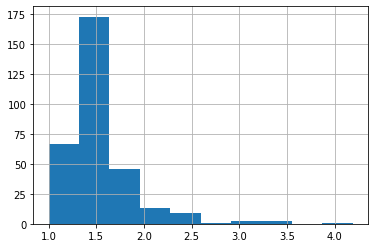

In [23]:
true_df.rate.hist()

<AxesSubplot:>

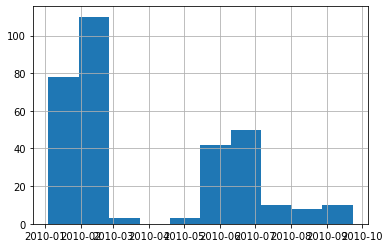

In [24]:
true_df.date_0.hist()

<AxesSubplot:>

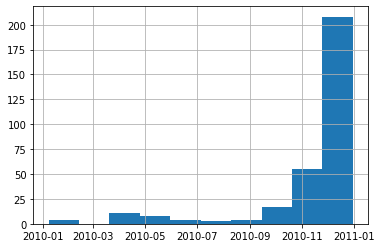

In [25]:
true_df.date_1.hist()

In [26]:
true_df.days.describe()

count    314.000000
mean     229.363057
std       92.294892
min        1.000000
25%      157.000000
50%      249.000000
75%      316.000000
max      360.000000
Name: days, dtype: float64

In [27]:
true_df.rate.describe()

count    314.000000
mean       1.543315
std        0.368915
min        1.000000
25%        1.342413
50%        1.457560
75%        1.627137
max        4.190922
Name: rate, dtype: float64

In [28]:
true_df.loc[true_df['rate'] <= 1.2]
# 밑에 같은 사례들이 존재함. 예를 들어 최소나 최대 값이 동일한 날이 있는 경우.
# 우선 drop

,Symbol,check,days,date_0,date_1,Close_min,Close_max,rate
4,ACN,True,1,2010-06-08,2010-06-09,36.439999,36.439999,1.0
32,AWK,True,3,2010-06-04,2010-06-07,19.920000,19.920000,1.0
95,CB,True,2,2010-01-06,2010-01-08,47.500000,47.500000,1.0
100,C,True,13,2010-01-26,2010-02-08,31.500000,31.500000,1.0
226,KDP,True,4,2010-02-04,2010-02-08,26.840000,26.840000,1.0
239,LYV,True,11,2010-08-13,2010-08-24,8.430000,8.430000,1.0
311,PNW,True,1,2010-05-25,2010-05-26,34.500000,34.500000,1.0
346,STX,True,5,2010-08-26,2010-08-31,10.140000,10.140000,1.0
360,STE,True,3,2010-01-29,2010-02-01,26.080000,26.080000,1.0
370,TDY,True,201,2010-02-04,2010-08-24,35.980000,35.980000,1.0


In [29]:
date_df.loc[date_df['Symbol'] == 'ACN']

,Date,Symbol,Close
16397,2010-06-08,ACN,36.439999
16398,2010-06-09,ACN,36.439999
16532,2010-12-17,ACN,50.320000


In [30]:
ex = true_df.loc[true_df['rate'] <= 1.2].index

In [31]:
true_df.drop(index = ex).rate.describe()

count    303.000000
mean       1.563039
std        0.360435
min        1.201060
25%        1.350280
50%        1.462295
75%        1.631465
max        4.190922
Name: rate, dtype: float64

<AxesSubplot:>

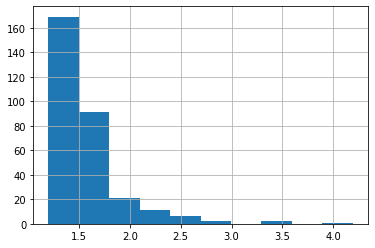

In [32]:
true_df.drop(index = ex).rate.hist()